In [167]:
#Data Collection & Loading for CTR Prediction (Click-Through Rate Prediction) Project

#import pandas, numpy, matplotlib, seaborn and sklearn libraries

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [168]:
#read a csv file and importing data
file_path = r"/content/aribnb_cdmx_2024_data.csv"
train_df = pd.read_csv(file_path)
train_df = pd.read_csv(file_path, nrows=1000)

In [169]:
train_df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,density_university,density_subway,density_restaurant,dis_to_tourist_point_per_neighborhood,cluster_geo,price_per_cluster,disponibility_cat,disponibility_per_review,min_nights_cat,average_measure
0,35797,Villa Dante,153786,Dici,Cuajimalpa de Morelos,19.38382,-99.27334,Entire home/apt,3865.0,1,...,0.000000,0.000000,0.000000,8.659602,15,1454.504348,high,0,shor_term,150-250 m²
1,67703,"2 bedroom apt. deco bldg, Condesa",334451,Nicholas,Cuauhtémoc,19.41152,-99.16857,Entire home/apt,2029.0,2,...,0.000000,0.000000,0.000000,3.895025,8,1775.377953,high,15925,shor_term,90-150 m²
2,70644,Beautiful light Studio Coyoacan- full equipped !,212109,Trisha,Coyoacán,19.35614,-99.16308,Entire home/apt,1140.0,5,...,1.029412,0.698529,0.220588,0.140610,11,1029.543619,high,32639,shor_term,40-60 m²
3,107078,NEW DESIGNER LOFT,540705,Andrea,Miguel Hidalgo,19.43211,-99.19327,Entire home/apt,3633.0,1,...,0.000000,0.000000,0.000000,1.778827,9,1883.109571,high,3025,shor_term,250-400 m²
4,165772,BEST 5 Bedroom HOUSE IN S. Miguel Chapultepec,790208,Francisco Carlos,Miguel Hidalgo,19.40826,-99.18659,Entire home/apt,3671.0,2,...,0.000000,0.299145,0.128205,1.458166,8,1775.377953,high,82110,shor_term,250-400 m²


In [170]:
#Data Description
train_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,logarithmic_price,...,density_hospital,density_supermarket,density_park,density_university,density_subway,density_restaurant,dis_to_tourist_point_per_neighborhood,cluster_geo,price_per_cluster,disponibility_per_review
count,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000
mean,7.721162e+06,2.833185e+07,19.400965,-99.171597,1465.300000,4.918000,106.232000,7.5260,247.102000,6.951642,...,0.331179,0.933265,7.349640,0.270706,0.527099,0.216967,2.898480,6.091000,1462.047037,26370.288
std,4.005337e+06,3.139768e+07,0.039481,0.027231,1881.932759,19.872095,120.880926,19.9787,113.790825,0.744781,...,0.879611,2.502724,19.234608,0.678552,1.447958,0.577728,1.880333,4.400009,338.850099,35885.187
min,3.579700e+04,3.683600e+04,19.188080,-99.293243,170.000000,1.000000,0.000000,1.0000,0.000000,5.141664,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031174,0.000000,809.442266,0.000
25%,4.505373e+06,7.838265e+06,19.384628,-99.180051,638.000000,1.000000,21.000000,1.0000,154.000000,6.459904,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.617982,1.000000,1092.665365,3334.250
50%,7.935010e+06,2.260495e+07,19.412810,-99.170020,1000.000000,2.000000,58.000000,2.0000,289.000000,6.908755,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.690843,8.000000,1596.396252,10957.500
75%,1.121412e+07,4.229134e+07,19.428350,-99.158660,1546.000000,3.000000,153.500000,6.0000,344.000000,7.344073,...,0.220588,0.683761,4.957265,0.000000,0.312500,0.147059,3.843151,9.000000,1775.377953,35709.750
max,1.404074e+07,4.953618e+08,19.516350,-99.078370,31386.000000,365.000000,680.000000,216.0000,365.000000,10.354149,...,3.456790,10.059880,75.277778,2.438272,6.287425,2.934132,15.341815,15.000000,1883.109571,219640.000


We can see in the observation above all off the statistical summaries in our data frame for our 1000 selected rows of data.

The statistical observations above are composed of the mean, standard deviation, minimum, 25%, 50%, 75% quartiles. etc for our numerical columns made up of the price, number of reviews, logarithmic price. etc.

In [171]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     1000 non-null   int64  
 1   name                                   1000 non-null   object 
 2   host_id                                1000 non-null   int64  
 3   host_name                              1000 non-null   object 
 4   neighbourhood                          1000 non-null   object 
 5   latitude                               1000 non-null   float64
 6   longitude                              1000 non-null   float64
 7   room_type                              1000 non-null   object 
 8   price                                  1000 non-null   float64
 9   minimum_nights                         1000 non-null   int64  
 10  number_of_reviews                      1000 non-null   int64  
 11  calcu

We can see that the dataset has 1000 entries and 39 columns composed of numerical and categorical data.

In our case we will focus on what amenities lead to high rental flow and analyze the price in order to decide if it is good business to buy a place in Mexico City.

The numerical columns (id, price, logarithmic price, etc.) represent various features, while columns like price_category, neighborhood etc., are categorical and contain object data types.

In [172]:
#Getting the last n rows
train_df.tail()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,density_university,density_subway,density_restaurant,dis_to_tourist_point_per_neighborhood,cluster_geo,price_per_cluster,disponibility_cat,disponibility_per_review,min_nights_cat,average_measure
995,13981214,Studio for rent,83369983,J Gaston,Tlalpan,19.287960,-99.219650,Entire home/apt,580.0,2,...,0.0,0.000000,0.000000,12.428943,7,989.767033,high,0,shor_term,40-60 m²
996,14026346,Great Condo in best Condesa location!,83940680,Christopher,Cuauhtémoc,19.414480,-99.171460,Entire home/apt,1054.0,1,...,0.0,0.000000,0.000000,3.921432,8,1775.377953,medium,7018,shor_term,50-70 m²
997,14027701,"Charming Apt in Roma Norte, best location eveeer",83967510,Mariana,Cuauhtémoc,19.416260,-99.163460,Entire home/apt,1681.0,2,...,0.0,0.000000,0.000000,3.143931,0,1596.396252,medium,30975,shor_term,90-150 m²
998,14038856,Modern Top Floor Apt with Incredible Street Views,50305161,Host Me Tender,Cuauhtémoc,19.409254,-99.173282,Entire home/apt,2004.0,3,...,0.0,0.432099,0.185185,4.431940,8,1775.377953,high,96954,shor_term,90-150 m²
999,14040741,"Penthouse exclusivo, doble altura, jacuzzi,vista",36159212,Yulia,Cuauhtémoc,19.435500,-99.169600,Entire home/apt,2500.0,2,...,0.0,0.000000,0.000000,2.978176,0,1596.396252,low,364,shor_term,90-150 m²


In [173]:
#Analyzing column data types and names
print(train_df.dtypes)
print(train_df.columns)

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                    float64
minimum_nights                             int64
number_of_reviews                          int64
calculated_host_listings_count             int64
availability_365                           int64
price_category                            object
logarithmic_price                        float64
supermarket                                int64
hospital                                   int64
university                                 int64
subway                                     int64
restaurant                                 int64
park                

Our data set contains 39 columns with integers, floats and objects. The columns represent features and attributes to every Airbnb place in our data set. Some of these include: pricing, price_category, average_measure. etc.

In [174]:
# Check for missing values
missing_values = train_df.isnull().sum()
print(missing_values[missing_values > 0]) # Show only columns with missing values

disponibility_cat    9
dtype: int64


We can see that we are missing values in 9 items in our dataset. So, we will drop this missing data in our code below.

In [175]:
#Drop or fill missing values

train_df.fillna("-1", inplace=True)

In [176]:
print(train_df)

           id                                               name   host_id  \
0       35797                                        Villa Dante    153786   
1       67703                  2 bedroom apt. deco bldg, Condesa    334451   
2       70644   Beautiful light Studio Coyoacan- full equipped !    212109   
3      107078                                 NEW  DESIGNER LOFT    540705   
4      165772      BEST 5 Bedroom HOUSE IN S. Miguel Chapultepec    790208   
..        ...                                                ...       ...   
995  13981214                                    Studio for rent  83369983   
996  14026346              Great Condo in best Condesa location!  83940680   
997  14027701   Charming Apt in Roma Norte, best location eveeer  83967510   
998  14038856  Modern Top Floor Apt with Incredible Street Views  50305161   
999  14040741   Penthouse exclusivo, doble altura, jacuzzi,vista  36159212   

            host_name          neighbourhood   latitude  longit

              name       host_id    host_name  neighbourhood   room_type  \
count  1000.000000  1.000000e+03  1000.000000    1000.000000  1000.00000   
mean    497.208000  2.833185e+07   227.643000       5.198000     0.74100   
std     287.883371  3.139768e+07   139.291384       3.279566     0.97307   
min       0.000000  3.683600e+04     0.000000       0.000000     0.00000   
25%     246.750000  7.838265e+06   112.000000       4.000000     0.00000   
50%     496.500000  2.260495e+07   224.000000       4.000000     0.00000   
75%     746.250000  4.229134e+07   361.000000       9.000000     2.00000   
max     996.000000  4.953618e+08   462.000000      13.000000     3.00000   

             price  minimum_nights  number_of_reviews  \
count  1000.000000     1000.000000        1000.000000   
mean    256.091000        4.918000          90.172000   
std     152.267778       19.872095          86.342454   
min       0.000000        1.000000           0.000000   
25%     128.000000        1.00

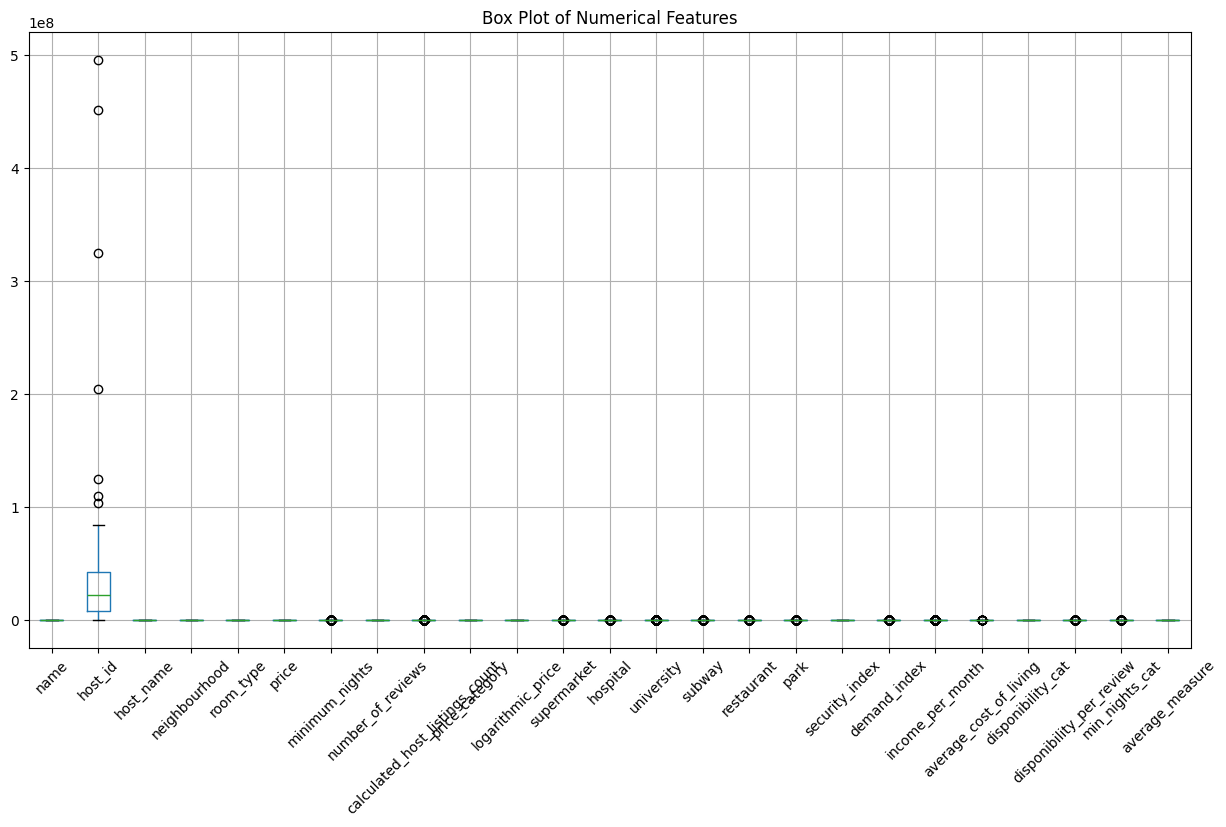

Outliers detected in each column:
 name                                0
host_id                             7
host_name                           0
neighbourhood                       0
room_type                           0
price                               0
minimum_nights                     93
number_of_reviews                   0
calculated_host_listings_count    141
price_category                      0
logarithmic_price                   0
supermarket                        71
hospital                           71
university                        218
subway                             91
restaurant                         80
park                               91
security_index                      0
demand_index                      110
income_per_month                  212
average_cost_of_living             16
disponibility_cat                   0
disponibility_per_review           79
min_nights_cat                     64
average_measure                     0
dtype: int64


In [193]:
#Handling Outliers
# Select numerical columns only
num_cols = train_df.select_dtypes(include=['int64', 'float64']).columns

# Check for outliers using summary statistics
print(train_df[num_cols].describe())

# Plot boxplots for numerical features to visualize outliers
plt.figure(figsize=(15, 8))
train_df[num_cols].boxplot(rot=45)
plt.title("Box Plot of Numerical Features")
plt.show()

# Detect outliers using the IQR method
Q1 = train_df[num_cols].quantile(0.25)
Q3 = train_df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((train_df[num_cols] < lower_bound) | (train_df[num_cols] > upper_bound)).sum()
print("Outliers detected in each column:\n", outliers)

Based on our obsevations we can see that out data frame has outliers in 27 out of the 39 rows. However, some of these are not relevant since they do not affect our focus study.

We can see that values without outliers are things such as security_index, and price per cluster.

In [194]:
# Option 1: Remove rows with extreme outliers
train_df_cleaned = train_df[~((train_df[num_cols] < lower_bound) | (train_df[num_cols] > upper_bound)).any(axis=1)]

# Option 2: Cap outliers at the threshold (Winsorization)
train_df_capped = train_df.copy()
train_df_capped[num_cols] = np.where(train_df[num_cols] < lower_bound, lower_bound, train_df[num_cols])
train_df_capped[num_cols] = np.where(train_df[num_cols] > upper_bound, upper_bound, train_df[num_cols])


# Define the directory for saving cleaned data
clean_data = r"..\data\clean_data"
os.makedirs(clean_data, exist_ok=True)

# Save cleaned data
train_df_cleaned.to_csv(os.path.join(clean_data, "removed_outliers.csv"), index=False)
train_df_capped.to_csv(os.path.join(clean_data, "capped_outliers.csv"), index=False)


print("Outlier handling complete! Files saved as 'cleaned_no_outliers.csv' and 'capped_outliers.csv'.")

Outlier handling complete! Files saved as 'cleaned_no_outliers.csv' and 'capped_outliers.csv'.


In [195]:
# Option 1: Remove rows with extreme outliers
train_df_cleaned = train_df[~((train_df[num_cols] < lower_bound) | (train_df[num_cols] > upper_bound)).any(axis=1)]

# Option 2: Cap outliers at the threshold (Winsorization)
train_df_capped = train_df.copy()
train_df_capped[num_cols] = np.where(train_df[num_cols] < lower_bound, lower_bound, train_df[num_cols])
train_df_capped[num_cols] = np.where(train_df[num_cols] > upper_bound, upper_bound, train_df[num_cols])


# Define the directory for saving cleaned data
clean_data = r"..\data\clean_data"
os.makedirs(clean_data, exist_ok=True)

# Save cleaned data
train_df_cleaned.to_csv(os.path.join(clean_data, "removed_outliers.csv"), index=False)
train_df_capped.to_csv(os.path.join(clean_data, "capped_outliers.csv"), index=False)


print("Outlier handling complete! Files saved as 'cleaned_no_outliers.csv' and 'capped_outliers.csv'.")

Outlier handling complete! Files saved as 'cleaned_no_outliers.csv' and 'capped_outliers.csv'.


In the code above we removed extreme outliers and renamed the result as "removed_outliers"

We also removed outliers using upper and lower bounds defined by the IQR method, leading to a capped dataset "capped_outliers.csv"



In [179]:
# Drop 'id' since it doesn’t help in our price and attraction prediction
columns_to_drop = ['id', 'cluster_geo', 'availability_365', 'latitude', 'longitude']

# Filter out columns that do not exist in the DataFrame
existing_columns_to_drop = [col for col in columns_to_drop if col in train_df.columns]

if existing_columns_to_drop:
    train_df.drop(columns=existing_columns_to_drop, inplace=True)

# Display the modified DataFrame
print(train_df.head())

                                               name  host_id  \
0                                       Villa Dante   153786   
1                 2 bedroom apt. deco bldg, Condesa   334451   
2  Beautiful light Studio Coyoacan- full equipped !   212109   
3                                NEW  DESIGNER LOFT   540705   
4     BEST 5 Bedroom HOUSE IN S. Miguel Chapultepec   790208   

          host_name          neighbourhood        room_type   price  \
0              Dici  Cuajimalpa de Morelos  Entire home/apt  3865.0   
1          Nicholas             Cuauhtémoc  Entire home/apt  2029.0   
2            Trisha               Coyoacán  Entire home/apt  1140.0   
3            Andrea         Miguel Hidalgo  Entire home/apt  3633.0   
4  Francisco Carlos         Miguel Hidalgo  Entire home/apt  3671.0   

   minimum_nights  number_of_reviews  calculated_host_listings_count  \
0               1                  0                               1   
1               2                 49        

id', 'cluster_geo', 'availability_365', 'latitude', 'longitude'


The id, cluster_geo, availability_365, latitude and longitude columns have been  dropped since they don't contribute to our data frame analysis use.

The modified DataFrame now has 34 columns.

In [180]:
# Remove duplicates if any
train_df.drop_duplicates(inplace=True)

We use the .drop_duplicates method above to remove any duplicate rows from the train_df DataFrame.

This ensures that each record is unique, and the dataset is clean for further analysis or modeling.

In [181]:
print(train_df.columns)

Index(['name', 'host_id', 'host_name', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count',
       'price_category', 'logarithmic_price', 'supermarket', 'hospital',
       'university', 'subway', 'restaurant', 'park', 'security_index',
       'demand_index', 'income_per_month', 'average_cost_of_living',
       'neighbourhood_area', 'density_hospital', 'density_supermarket',
       'density_park', 'density_university', 'density_subway',
       'density_restaurant', 'dis_to_tourist_point_per_neighborhood',
       'price_per_cluster', 'disponibility_cat', 'disponibility_per_review',
       'min_nights_cat', 'average_measure'],
      dtype='object')


In [182]:
# List of categorical columns
categorical_columns = [ 'demand_index', 'logarithmic_price', 'price','name', 'host_name', 'neighbourhood', 'room_type',
       'number_of_reviews', 'price_category', 'security_index', 'average_cost_of_living', 'min_nights_cat', 'average_measure', 'disponibility_cat']
# Label Encoding for categorical features
label_encoders = {}
for col in categorical_columns:
        label_encoders[col] = LabelEncoder()
        train_df[col] = label_encoders[col].fit_transform(train_df[col])
# Now, your categorical features are numerically encoded and ready for use in model training

In [183]:
#Converting categorical columns to category dtype and categorial feature to numerical format
#idenfying categorial columns
categorical_cols = [col for col in train_df.columns if train_df[col].dtype == 'object' and col not in ['id', 'click']]
for col in categorical_cols:
    train_df[col] = train_df[col].astype('category')  # Convert to categorical dtype
    train_df[col] = train_df[col].cat.codes  # Convert to numerical encoding


In [184]:
# Optimize memory usage
def reduce_memory(train_df):
    for col in train_df.columns:
        if train_df[col].dtype == 'float64':
            train_df[col] = train_df[col].astype('int32')
        elif train_df[col].dtype == 'float32':
            train_df[col] = train_df[col].astype('int32')
    return train_df

train_df = reduce_memory(train_df)

In [185]:
# Display final clean dataset
print(train_df.info())
print(train_df.head())  # Check cleaned data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 34 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   name                                   1000 non-null   int64
 1   host_id                                1000 non-null   int64
 2   host_name                              1000 non-null   int64
 3   neighbourhood                          1000 non-null   int64
 4   room_type                              1000 non-null   int64
 5   price                                  1000 non-null   int64
 6   minimum_nights                         1000 non-null   int64
 7   number_of_reviews                      1000 non-null   int64
 8   calculated_host_listings_count         1000 non-null   int64
 9   price_category                         1000 non-null   int64
 10  logarithmic_price                      1000 non-null   int64
 11  supermarket                    

The first few rows show that the features have been encoded numerically, and all categorical features have now been converted into integer values.

The columns appear to represent various features related to ammenities, pricing and lenght of stay for example:

neighbourhood: Could be an encoded categorical feature related to safety and ammenities offered.

density_subway likely represents the main mode of transportation in the area.

dis_to_tourist_point_per_neighborhood represents highly sought points of interests that tourists frequent.

In [186]:
# Define the directory for saving cleaned data
clean_data = r"..\data\clean_data"
os.makedirs(clean_data, exist_ok=True)

# Save cleaned data
train_df.to_csv(os.path.join(clean_data, "cleaned_airbnb_cdmx_2024_prediction_data"), index=False)

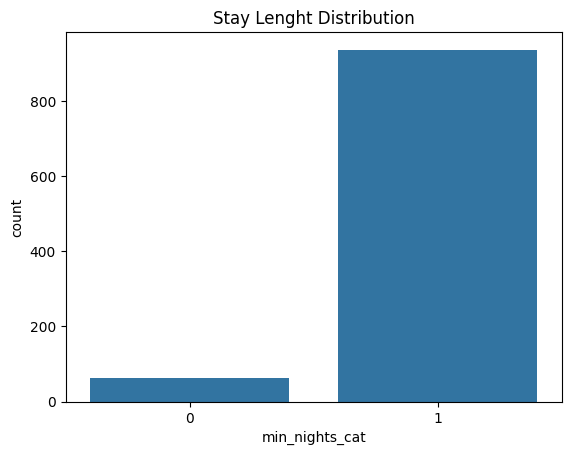

In [187]:
# Visualize target distribution
sns.countplot(x=train_df['min_nights_cat'])
plt.title("Stay Lenght Distribution")
plt.show()

X-axis: "min_nights_cat" with values 0 and 1.

Y-axis: "count" representing the number of occurrences of each value.

The plot shows that there are significantly more stays with min_nights_cat >1 than min_nights_cat = 0.

This indicates an imbalanced dataset, where the majority of stays were greater than 0.

In [188]:
# Save the cleaned data to a CSV file
#train_df.to_csv("cleaned_ctr_prediction_data.csv", index=False)
# Save cleaned data
train_df.to_csv(os.path.join(clean_data, "cleaned_airbnb_cdmx_2024_prediction_data.csv"), index=False)

print("Data cleaning and wrangling complete. File saved as 'cleaned_airbnb_cdmx_2024_prediction_data.csv'.")

Data cleaning and wrangling complete. File saved as 'cleaned_airbnb_cdmx_2024_prediction_data.csv'.
